In [3]:
import keras, vis

In [4]:
#Make sure GPU is recognised
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4566556491708791380
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 78249984
locality {
  bus_id: 1
}
incarnation: 9510394189912914584
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [5]:
model = keras.models.load_model('trainHistory/12-10 09.34, train_err=0.66, test_err=0.73log600epoch.h5')

In [6]:
# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [7]:
layer_dict['conv2d_1']

{'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7f774ce3a630>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7f774ce78550>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7f774ce2ff28>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7f774cdf1748>,
 'dense_1': <keras.layers.core.Dense at 0x7f774cd3ddd8>,
 'dense_2': <keras.layers.core.Dense at 0x7f774cda2f98>,
 'dense_3': <keras.layers.core.Dense at 0x7f774cd03668>,
 'dropout_1': <keras.layers.core.Dropout at 0x7f774cda2f28>,
 'dropout_2': <keras.layers.core.Dropout at 0x7f774cd03e10>,
 'flatten_1': <keras.layers.core.Flatten at 0x7f774cd8c2e8>,
 'input_1': <keras.engine.topology.InputLayer at 0x7f774ce3a5f8>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x7f774ce3a748>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x7f774ce3aa58>,
 'max_pooling2d_3': <keras.layers.pooling.MaxPooling2D at 0x7f774cdc6ac8>,
 'max_pooling2d_4': <keras.layers.pooling.MaxPooling2D at 0x7f774ce15240>}

In [8]:
layer_dict['conv2d_1']

In [10]:
import vis as kerasvis

In [15]:
from vis import visualization as kerasvis

In [19]:
import numpy as np

In [30]:
kerasvis.activation_maximization.visualize_activation(model,layer_idx=0,filter_indices=0,)

array([[[126],
        [134],
        [126],
        ..., 
        [134],
        [126],
        [134]],

       [[134],
        [126],
        [134],
        ..., 
        [126],
        [134],
        [126]],

       [[126],
        [134],
        [126],
        ..., 
        [134],
        [126],
        [134]],

       ..., 
       [[130],
        [116],
        [130],
        ..., 
        [122],
        [131],
        [123]],

       [[118],
        [128],
        [118],
        ..., 
        [131],
        [123],
        [131]],

       [[128],
        [120],
        [128],
        ..., 
        [123],
        [131],
        [255]]], dtype=uint8)

In [33]:
#visualizing convnets

In [35]:
from vis.utils import utils
from keras import activations

In [60]:
from utils import reshape_to_view_img

In [44]:
from matplotlib.colorbar import cm

In [67]:
layer_idx =58

In [69]:
import pandas as pd

In [78]:
df = pd.read_csv('train_onelabel.csv')

In [89]:
def show_pic_from(class_nr):
    pic_name = df[df['class']==class_nr]['image'].iloc[2]
    plt.imshow(reshape_to_view_img(load_img('competition_data/train_images/'+pic_name)))
    return reshape_to_view_img('competition_data/train_images/'+pic_name)

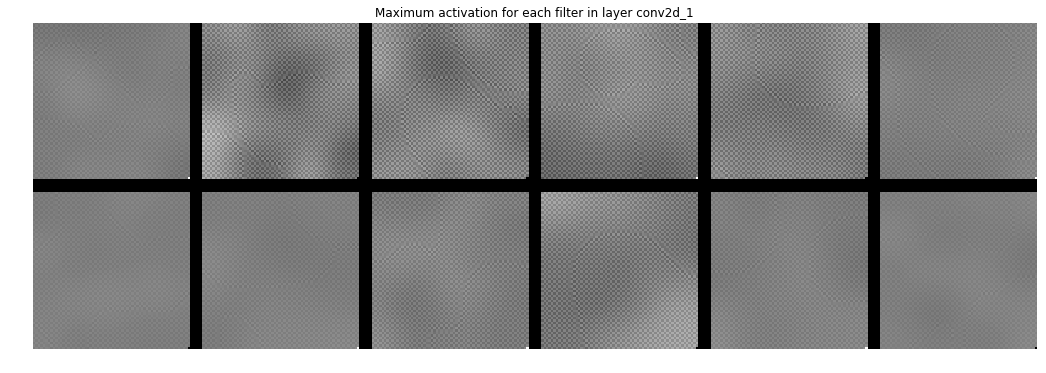

In [95]:
from vis.visualization import get_num_filters

# The name of the layer we want to visualize
# You can see this in the model definition.
layer_name = 'conv2d_1'

# def plot_max_activations(layer_name, model)
layer_idx = utils.find_layer_idx(model, layer_name)

# Visualize all filters in this layer.
filters = np.arange(get_num_filters(model.layers[layer_idx]))

# Generate input image for each filter.
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)
    
    # Utility to overlay text on image.
    #img = utils.draw_text(img, 'Filter {}'.format(idx))    
    vis_images.append(img)

# Generate stitched image palette with 8 cols.
stitched = utils.stitch_images(vis_images, cols=6) 

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.imshow(reshape_to_view_img(stitched),cmap='RdBu')
fig.set_tight_layout(True)
plt.title('Maximum activation for each filter in layer '+layer_name)
plt.axis('off')

(-0.5, 408.5, 132.5, -0.5)

/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


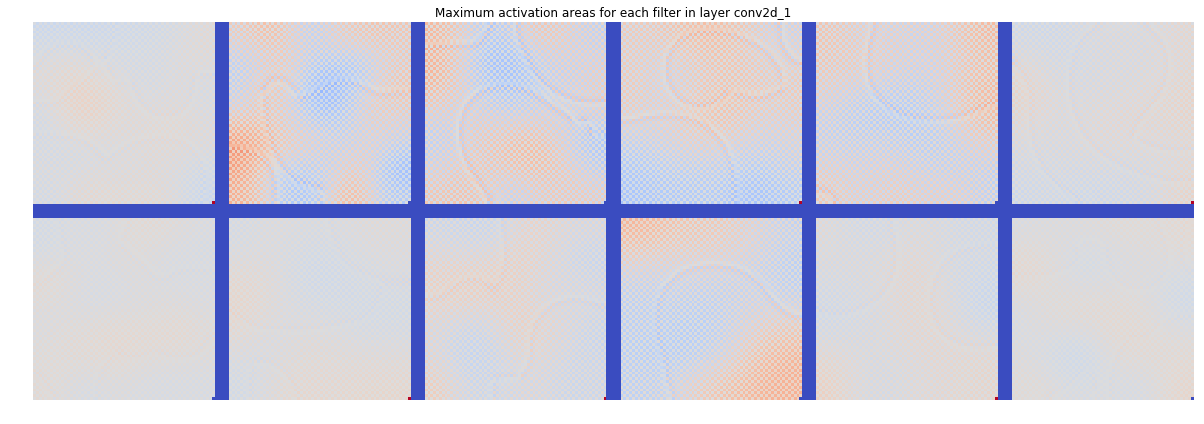

In [122]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.imshow(reshape_to_view_img(stitched),cmap='coolwarm')
fig.set_tight_layout(True)
plt.title('Maximum activation areas for each filter in layer '+layer_name)
plt.axis('off')

(-0.5, 408.5, 270.5, -0.5)

/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


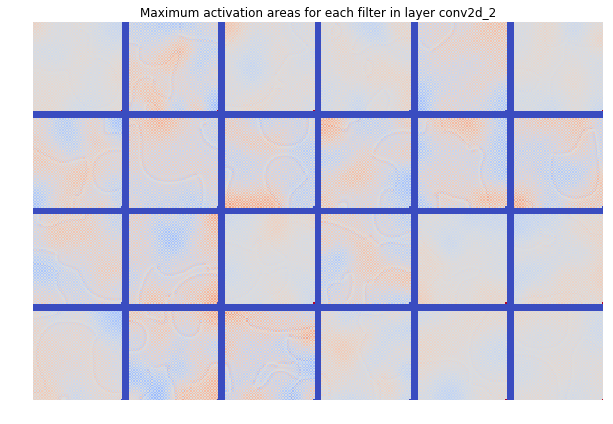

In [124]:
# 2nd conv layer
from vis.visualization import get_num_filters

# The name of the layer we want to visualize
# You can see this in the model definition.
layer_name = 'conv2d_2'

# def plot_max_activations(layer_name, model)
layer_idx = utils.find_layer_idx(model, layer_name)

# Visualize all filters in this layer.
filters = np.arange(get_num_filters(model.layers[layer_idx]))

# Generate input image for each filter.
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)
    
    # Utility to overlay text on image.
    #img = utils.draw_text(img, 'Filter {}'.format(idx))    
    vis_images.append(img)

# Generate stitched image palette with 8 cols.
stitched = utils.stitch_images(vis_images, cols=6) 

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.imshow(reshape_to_view_img(stitched),cmap='coolwarm')
fig.set_tight_layout(True)
plt.title('Maximum activation areas for each filter in layer '+layer_name)
plt.axis('off')

(-0.5, 408.5, 546.5, -0.5)

/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


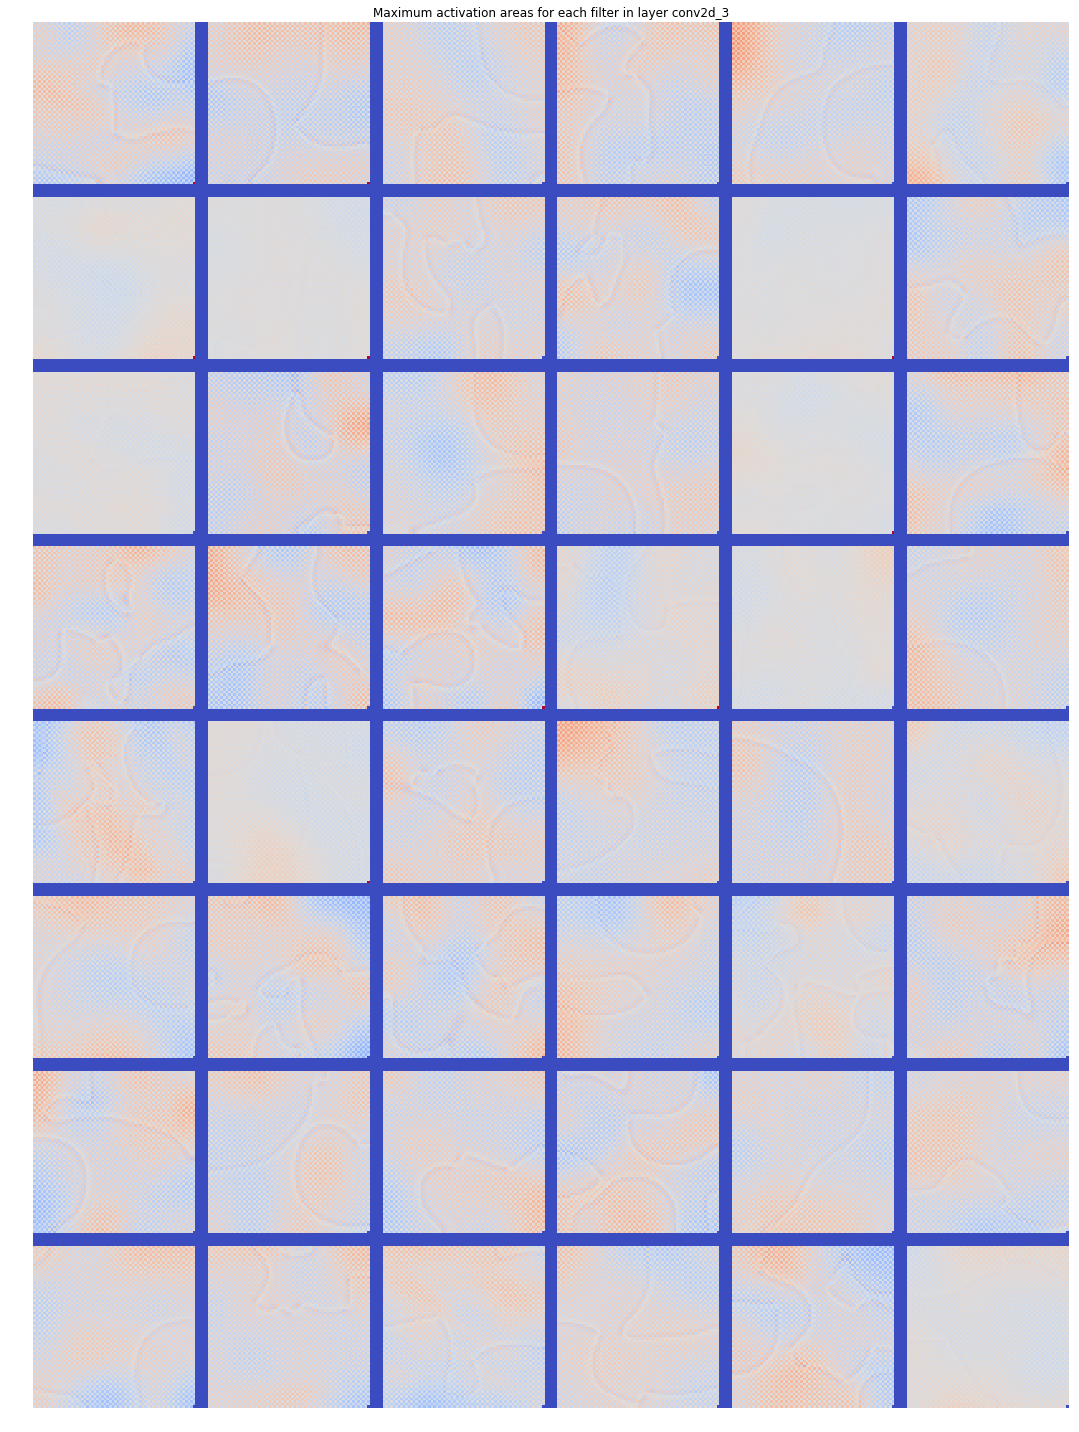

In [129]:
fig = plt.figure(figsize=(len(filters),20))
fig.patch.set_facecolor('white')
plt.imshow(reshape_to_view_img(stitched),cmap='coolwarm')
fig.set_tight_layout(True)
plt.title('Maximum activation areas for each filter in layer '+layer_name)
plt.axis('off')


(-0.5, 408.5, 546.5, -0.5)

/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


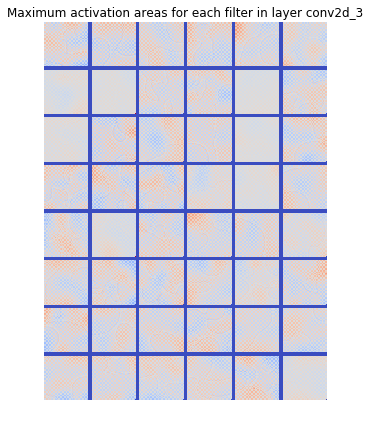

In [125]:
# 2nd conv layer
from vis.visualization import get_num_filters

# The name of the layer we want to visualize
# You can see this in the model definition.
layer_name = 'conv2d_3'

# def plot_max_activations(layer_name, model)
layer_idx = utils.find_layer_idx(model, layer_name)

# Visualize all filters in this layer.
filters = np.arange(get_num_filters(model.layers[layer_idx]))

# Generate input image for each filter.
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)
    
    # Utility to overlay text on image.
    #img = utils.draw_text(img, 'Filter {}'.format(idx))    
    vis_images.append(img)

# Generate stitched image palette with 8 cols.
stitched = utils.stitch_images(vis_images, cols=6) 

fig = plt.figure(figsize=(len(filters),6))
fig.patch.set_facecolor('white')
plt.imshow(reshape_to_view_img(stitched),cmap='coolwarm')
fig.set_tight_layout(True)
plt.title('Maximum activation areas for each filter in layer '+layer_name)
plt.axis('off')


(-0.5, 408.5, 1098.5, -0.5)

/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


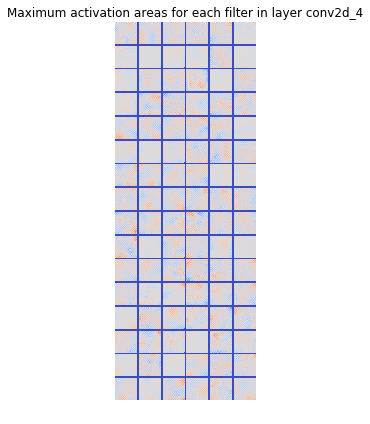

In [130]:
# 4th conv layer
from vis.visualization import get_num_filters

# The name of the layer we want to visualize
# You can see this in the model definition.
layer_name = 'conv2d_4'

# def plot_max_activations(layer_name, model)
layer_idx = utils.find_layer_idx(model, layer_name)

# Visualize all filters in this layer.
filters = np.arange(get_num_filters(model.layers[layer_idx]))

# Generate input image for each filter.
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)
    
    # Utility to overlay text on image.
    #img = utils.draw_text(img, 'Filter {}'.format(idx))    
    vis_images.append(img)

# Generate stitched image palette with 8 cols.
stitched = utils.stitch_images(vis_images, cols=6) 

fig = plt.figure(figsize=(len(filters),6))
fig.patch.set_facecolor('white')
plt.imshow(reshape_to_view_img(stitched),cmap='coolwarm')
fig.set_tight_layout(True)
plt.title('Maximum activation areas for each filter in layer '+layer_name)
plt.axis('off')

# Dense layer

In [131]:
from keras import activations

In [132]:
layer_idx = -1 #last layer

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

In [155]:
df[df['image']=='190.jpg']

,image,class
14036,190.jpg,63


(-0.5, 63.5, 63.5, -0.5)

/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


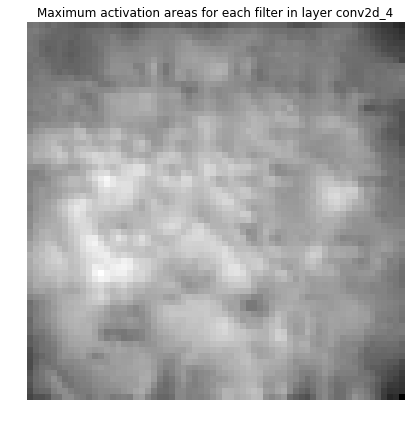

In [156]:
from vis.visualization import visualize_activation

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img = visualize_activation(model, layer_idx, filter_indices=63, max_iter=500)


fig = plt.figure(figsize=(len(filters),6))
fig.patch.set_facecolor('white')
plt.imshow(reshape_to_view_img(img),cmap='gray')
fig.set_tight_layout(True)
plt.title('Maximum activation areas for each filter in layer '+layer_name)
plt.axis('off')


In [8]:
from keras import backend as K

layer_name = 'conv2d_1'
filter_index = 0  # can be any integer from 0 to 511, as there are 512 filters in that layer

In [11]:
from keras.preprocessing.image import load_img

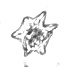

In [28]:
input_img = load_img('competition_data/train_images/101684.jpg',grayscale=True)
input_img

In [32]:
frst_layer = layer_dict[layer_name]

In [44]:
#bias
frst_layer.get_weights()[1]

array([-0.05600118, -0.33565995, -0.14490384, -0.18817265, -0.26759693,
        0.02544145, -0.00467337, -0.07473867, -0.05051401, -0.40175915,
       -0.00875476, -0.00221949], dtype=float32)

In [57]:
frst_layer.get_weights()[0]

array([[[[ 0.00168714,  0.03730316, -0.09133507,  0.05162638, -0.103994  ,
           0.00297108, -0.01043937, -0.14880322, -0.02788328, -0.25762171,
          -0.05156159,  0.10142642]],

        [[ 0.00613804,  0.04818518, -0.19407776, -0.0519711 , -0.14777371,
           0.03842548, -0.06852973, -0.14593266,  0.08016398, -0.21950275,
          -0.21363544,  0.08679141]],

        [[-0.00488916, -0.07159758, -0.0736248 , -0.31869188,  0.16712458,
           0.05740857,  0.04121884, -0.04645249,  0.05992603, -0.20011252,
          -0.039642  ,  0.03939731]]],


       [[[-0.06736606, -0.0751532 , -0.19759978,  0.01472983, -0.11182761,
          -0.01222839,  0.18540061,  0.14721702, -0.10512642, -0.18871869,
           0.07645886,  0.04462497]],

        [[ 0.02082779, -0.15825865,  0.02284694,  0.02847188,  0.18697746,
           0.03974245, -0.03995086,  0.30912486, -0.03949374, -0.15101513,
           0.05752362,  0.01817744]],

        [[-0.03980841, -0.26213762, -0.03046841, -0.1

In [47]:
w_1st_layer = np.reshape(frst_layer.get_weights()[0],(3,3,12))

In [54]:
w_1st_layer

array([[[ 0.00168714,  0.03730316, -0.09133507,  0.05162638, -0.103994  ,
          0.00297108, -0.01043937, -0.14880322, -0.02788328, -0.25762171,
         -0.05156159,  0.10142642],
        [ 0.00613804,  0.04818518, -0.19407776, -0.0519711 , -0.14777371,
          0.03842548, -0.06852973, -0.14593266,  0.08016398, -0.21950275,
         -0.21363544,  0.08679141],
        [-0.00488916, -0.07159758, -0.0736248 , -0.31869188,  0.16712458,
          0.05740857,  0.04121884, -0.04645249,  0.05992603, -0.20011252,
         -0.039642  ,  0.03939731]],

       [[-0.06736606, -0.0751532 , -0.19759978,  0.01472983, -0.11182761,
         -0.01222839,  0.18540061,  0.14721702, -0.10512642, -0.18871869,
          0.07645886,  0.04462497],
        [ 0.02082779, -0.15825865,  0.02284694,  0.02847188,  0.18697746,
          0.03974245, -0.03995086,  0.30912486, -0.03949374, -0.15101513,
          0.05752362,  0.01817744],
        [-0.03980841, -0.26213762, -0.03046841, -0.17298779, -0.067389  ,
    

In [40]:
import numpy as np

In [41]:
layer_output

<tf.Tensor 'conv2d_1_1/Relu:0' shape=(?, 64, 64, 12) dtype=float32>

In [30]:
# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, filter_index])

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

ValueError: Argument must be a dense tensor: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=69x67 at 0x7F4F50238828> - got shape [67, 69], but wanted [].